In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys


In [3]:
data = pd.read_csv("./datasets/german_credit_data.csv")
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
data.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [6]:
data.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [8]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [11]:
df_encoded = pd.get_dummies(data, drop_first=True)

In [14]:
from sklearn.preprocessing  import StandardScaler
scaler = StandardScaler()

df_encoded[["Age", "Credit amount", "Duration"]] = scaler.fit_transform(df_encoded[["Age", "Credit amount", "Duration"]])

In [17]:
df_encoded.head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,2.766456,2,-0.745131,-1.236478,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,-1.191404,2,0.949817,2.248194,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,1.183312,1,-0.416562,-0.738668,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.831502,2,1.634247,1.750384,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,1.535122,2,0.566664,0.256953,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [20]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Risk_good", axis=1)
y = df_encoded["Risk_good"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

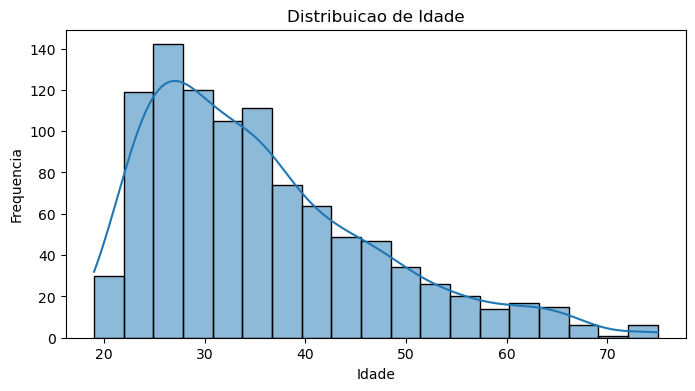

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(data["Age"], kde=True)
plt.title("Distribuicao de Idade")
plt.xlabel("Idade")
plt.ylabel("Frequencia")
plt.show()

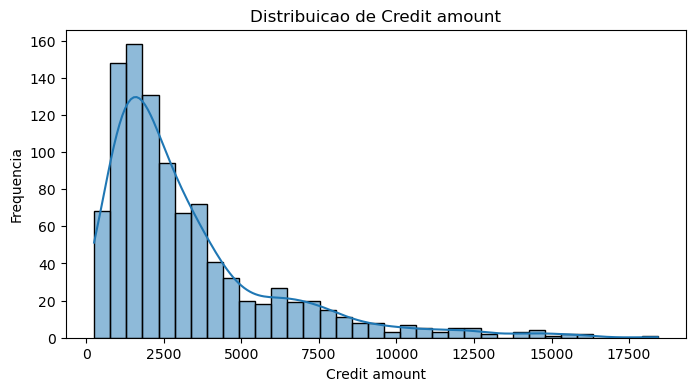

In [23]:
# Distribuicao da quantidade de credito

plt.figure(figsize=(8, 4))
sns.histplot(data["Credit amount"], kde=True)
plt.title("Distribuicao de Credit amount")
plt.xlabel("Credit amount")
plt.ylabel("Frequencia")
plt.show()

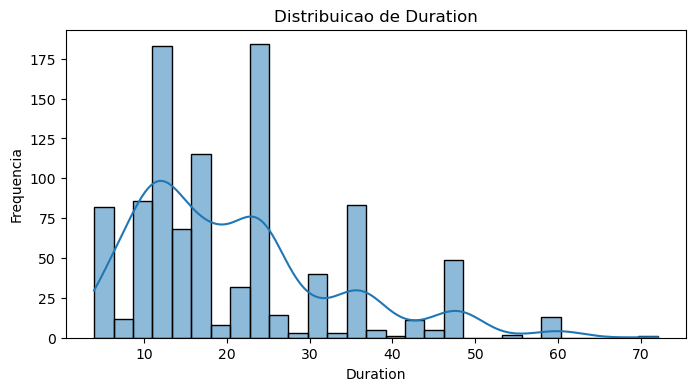

In [24]:
#  Distribuicao da duracao do credito

plt.figure(figsize=(8, 4))	
sns.histplot(data["Duration"], kde=True)
plt.title("Distribuicao de Duration")
plt.xlabel("Duration")
plt.ylabel("Frequencia")
plt.show()


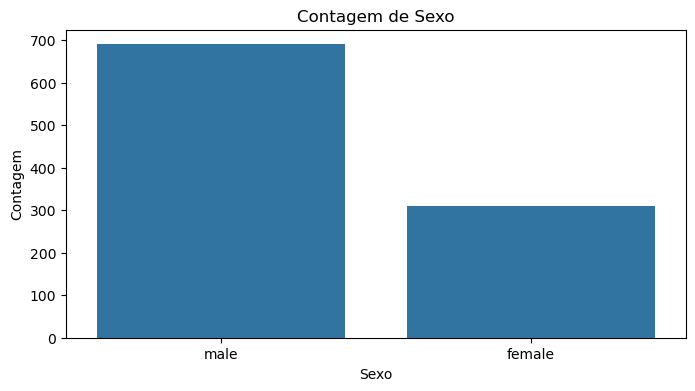

In [25]:
# contagem de sexo

plt.figure(figsize=(8, 4))
sns.countplot(x="Sex", data=data)
plt.title("Contagem de Sexo")
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.show()

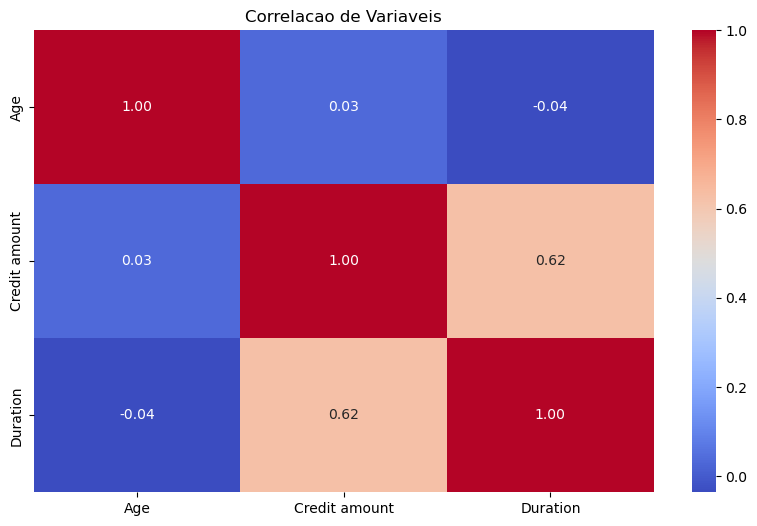

In [27]:
# correlacao de variaveis numericas 

corr_vars  = data[["Age", "Credit amount", "Duration"]].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_vars, cmap="coolwarm",fmt='.2f', annot=True)
plt.title("Correlacao de Variaveis")
plt.show()

In [29]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")

model.fit(X_train, y_train)


C:\Users\joao.katombela\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [08:52:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [30]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f"Acuracia: {accuracy}")
print(f"Classification Report: {classification_report}")

Acuracia: 0.685
Classification Report:               precision    recall  f1-score   support

       False       0.45      0.32      0.38        59
        True       0.75      0.84      0.79       141

    accuracy                           0.69       200
   macro avg       0.60      0.58      0.58       200
weighted avg       0.66      0.69      0.67       200



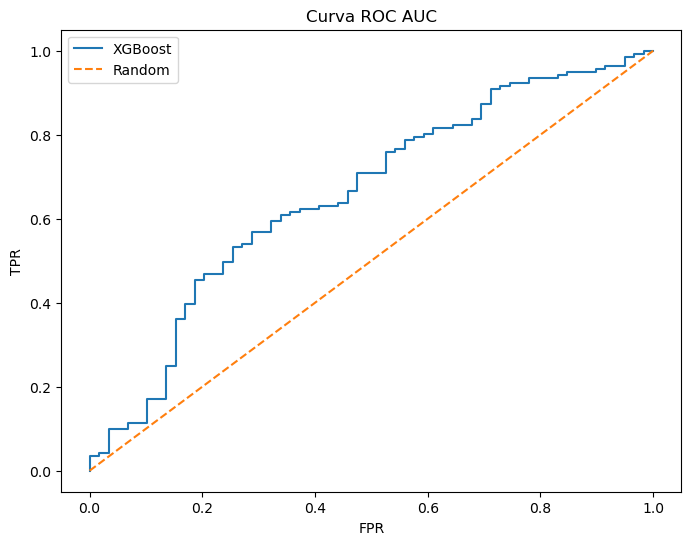

ROC AUC: 0.6565692991946147


In [34]:
#  Curva ROC AUC

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="XGBoost")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.title("Curva ROC AUC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc}")




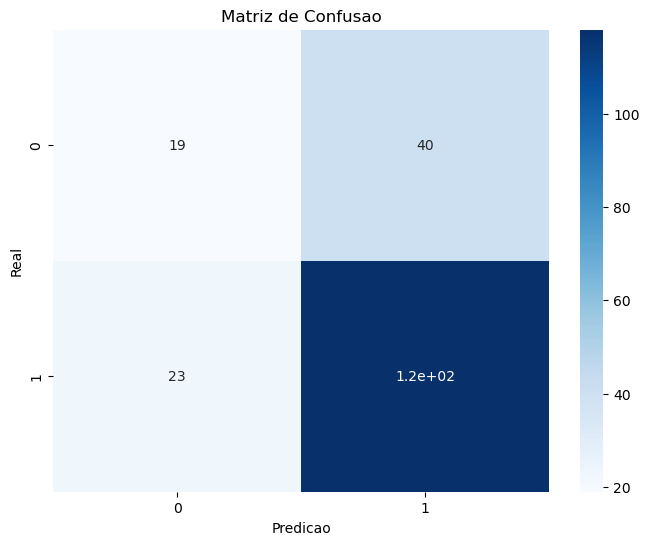

In [35]:
# calculando a matriz da confusao 

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.title("Matriz de Confusao")
plt.xlabel("Predicao")
plt.ylabel("Real")
plt.show()


In [36]:
#  usando o modelo de regressao linear 

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

# y_pred_lr = model_lr.predict(X_test)

LogisticRegression()

In [41]:
y_pred_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)

# classification_report_lr = classification_report(y_test, y_pred_lr)

print(f"Acuracia: {accuracy_lr}")
# print(f"Classification Report: {classification_report_lr}")

Acuracia: 0.7


In [42]:
#  exportando o modelo criado

import joblib

joblib.dump(model, "model_xgboost.pkl")

#  exportando o modelo de regressao logistica

joblib.dump(model_lr, "model_lr.pkl")

#  exportando o scaler

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [43]:
df_encoded.to_csv("df_encoded.csv", index=False)

In [44]:
df_encoded.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Checking account_rich', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Risk_good'],
      dtype='object')